# Python Pandas

An often used tool when doing data analysis with Python is <a href="https://pandas.pydata.org/">Pandas</a>.
Pandas is designed for working with tabular or heterogeneous data
This appendix is a brief intrdouction to the utilities that the package offers.

https://www.kdnuggets.com/10-essential-pandas-functions-every-data-scientist-should-know

In [2]:
import pandas as pd
import numpy as np

The two workhorse data structures in pandas are: _Series_ and _DataFrame_. Let's discuss these.

In [18]:
obj = pd.Series([4, 7, -5, 3])

In [19]:
# get the values
obj.values

array([ 4,  7, -5,  3])

In [20]:
# get the index
obj.index

RangeIndex(start=0, stop=4, step=1)

In [21]:
# create a Series by specifying the index
# Compared with NumPy arrays, you can use labels in the index when selecting single
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])

In [22]:
# we can perform numpy operations on pandas
obj2[obj2 > 0]

d    4
b    7
c    3
dtype: int64

In [23]:
np.exp(obj2)

d      54.598150
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

In [24]:
#we can create  a Series from a dictionary
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [27]:
# When only passing a dict, the index in the resulting Series will have the dict’s
# keys in sorted order. You can override this by passing the dict keys in the order you
# want them to appear in the resulting Series.
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)

# Since 'Utah' was not included in
# states, it is excluded from the resulting object
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [3]:
# read a CSV file
compas_df = pd.read_csv('/home/alex/qi3/qi3_notes/feature_engine_bootcamp/data/compas-scores-two-years.csv')


In [5]:
# see the first 10 rows
compas_df.head(n=10)

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0
5,7,marsha miles,marsha,miles,2013-11-30,Male,1971-08-22,44,25 - 45,Other,...,1,Low,2013-11-30,2013-11-30,2013-12-01,0,1,853,0,0
6,8,edward riddle,edward,riddle,2014-02-19,Male,1974-07-23,41,25 - 45,Caucasian,...,2,Low,2014-02-19,2014-03-31,2014-04-18,14,5,40,1,1
7,9,steven stewart,steven,stewart,2013-08-30,Male,1973-02-25,43,25 - 45,Other,...,3,Low,2013-08-30,2014-05-22,2014-06-03,3,0,265,0,0
8,10,elizabeth thieme,elizabeth,thieme,2014-03-16,Female,1976-06-03,39,25 - 45,Caucasian,...,1,Low,2014-03-16,2014-03-15,2014-03-18,0,2,747,0,0
9,13,bo bradac,bo,bradac,2013-11-04,Male,1994-06-10,21,Less than 25,Caucasian,...,5,Medium,2013-11-04,2015-01-06,2015-01-07,1,0,428,1,1


We can group the data and also plot


In [7]:
grouped_race = compas_df.groupby('race')

Check statistics about the grouped data

In [8]:
grouped_race.describe()

id                                                    \
                   count         mean          std    min      25%     50%   
race                                                                         
African-American  3696.0  5524.856872  3164.042069    3.0  2790.75  5517.0   
Asian               32.0  5770.093750  3202.147156  730.0  2655.50  6365.5   
Caucasian         2454.0  5488.236349  3165.242952    8.0  2760.25  5539.0   
Hispanic           637.0  5518.141287  3239.228092   21.0  2589.00  5548.0   
Native American     18.0  4379.388889  3073.921181  696.0  1927.00  3114.5   
Other              377.0  5356.838196  3257.307691    1.0  2475.00  5264.0   

                                       age             ... event       \
                      75%      max   count       mean  ...   75%  max   
race                                                   ...              
African-American  8239.25  11000.0  3696.0  32.740801  ...  1.00  1.0   
Asian             8285.25  10875.0    32.0  37.781250  ...  0.25  1.0   
Caucasian         8204.00  10992.0  2454.0  37.726569  ...  1.00  1.0   
Hispanic          8427.00  11001.0   637.0  35.455259  ...  1.00  1.0   
Native American   6679.25  10468.0    18.0  32.888889  ...  1.00  1.0   
Other             8277.00  10999.0   377.0  35.013263  ...  1.00  1.0   

                 two_year_recid                                               
                          count      mean       std  min  25%  50%  75%  max  
race                                                                          
African-American         3696.0  0.514340  0.499862  0.0  0.0  1.0  1.0  1.0  
Asian                      32.0  0.281250  0.456803  0.0  0.0  0.0  1.0  1.0  
Caucasian                2454.0  0.393643  0.488657  0.0  0.0  0.0  1.0  1.0  
Hispanic                  637.0  0.364207  0.481585  0.0  0.0  0.0  1.0  1.0  
Native American            18.0  0.555556  0.511310  0.0  0.0  1.0  1.0  1.0  
Other                     377.0  0.352785  0.478472  0.0  0.0  0.0  1.0  1.0  

[6 rows x 160 columns]

<AxesSubplot:title={'center':'Decile Score Histogram by Race'}, xlabel='race', ylabel='% with Decile Score'>

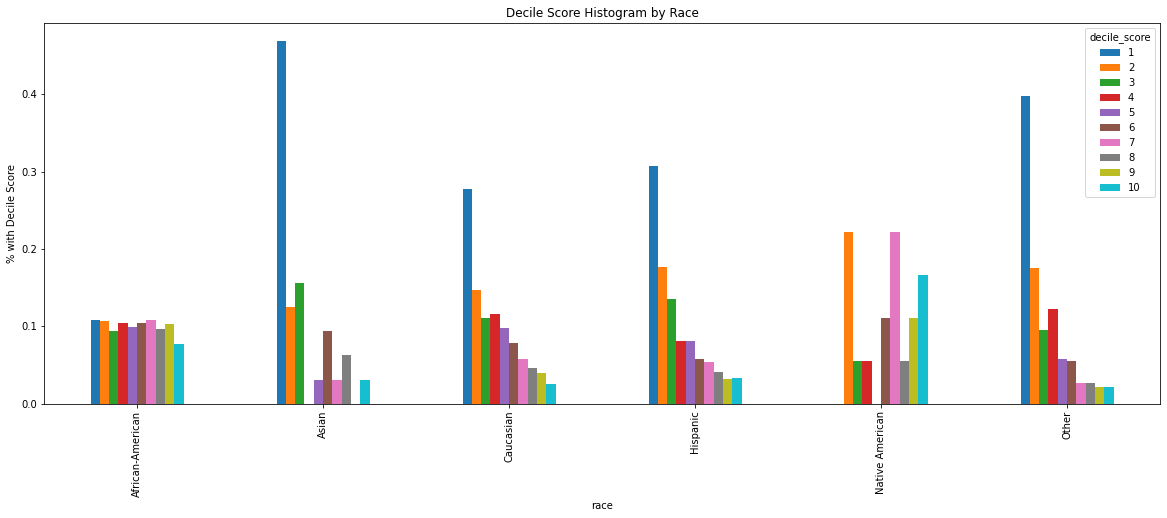

In [9]:
grouped_race['decile_score'].value_counts(
    normalize=True
).unstack().plot(
    kind='bar', figsize=(20, 7),
    title='Decile Score Histogram by Race', ylabel='% with Decile Score'
)

In [10]:
grouped_race['decile_score'].describe()

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
African-American,3696.0,5.368777,2.831122,1.0,3.00,5.0,8.00,10.0
Asian,32.0,2.937500,2.601953,1.0,1.00,2.0,3.50,10.0
Caucasian,2454.0,3.735126,2.597926,1.0,1.00,3.0,5.00,10.0
Hispanic,637.0,3.463108,2.599100,1.0,1.00,3.0,5.00,10.0
Native American,18.0,6.166667,2.975389,2.0,3.25,7.0,8.75,10.0
Other,377.0,2.949602,2.350895,1.0,1.00,2.0,4.00,10.0


The Asian and Native American are under represented in the dataset. We will relabel these as others.

<AxesSubplot:title={'center':'Actual Recidivism Rates by Race'}, xlabel='race'>

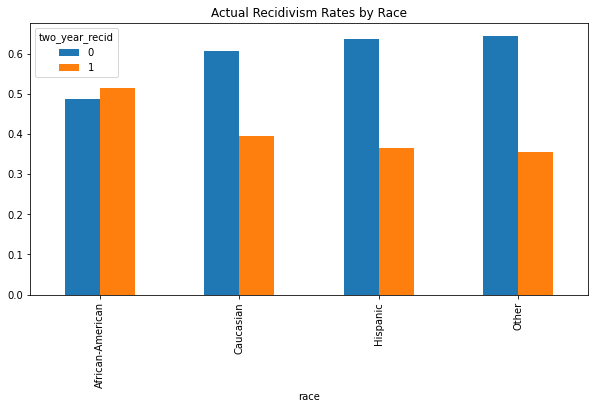

In [11]:
compas_df.loc[compas_df['race'].isin(['Native American', 'Asian']), 'race'] = 'Other'
 
compas_df.groupby('race')['two_year_recid'].value_counts(
    normalize=True
).unstack().plot(
    kind='bar', figsize=(10, 5), title='Actual Recidivism Rates by Race'
)

<AxesSubplot:title={'center':'% of Charge Degree'}, xlabel='Charge Degree', ylabel='%'>

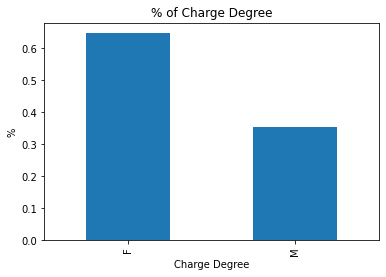

In [14]:
compas_df['c_charge_degree'].value_counts(normalize=True).plot(
   kind='bar', title='% of Charge Degree', ylabel='%', xlabel='Charge Degree'
)

In [15]:
# add columns together
compas_df['juv_count'] = compas_df[["juv_fel_count", "juv_misd_count", "juv_other_count"]].sum(axis=1)


In [16]:
# drop columns
compas_df = compas_df.drop(["juv_fel_count", "juv_misd_count", "juv_other_count"], axis=1)

In [17]:
compas_df.describe()

,id,age,decile_score,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,r_days_from_arrest,violent_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,start,end,event,two_year_recid,juv_count
count,7214.000000,7214.000000,7214.000000,7214.000000,6907.000000,7192.000000,7214.000000,2316.000000,0.0,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000
mean,5501.255753,34.817993,4.509565,3.472415,3.304763,57.731368,0.481148,20.269430,NaN,0.113529,4.509565,3.691849,3.472415,11.465068,553.436651,0.382867,0.450652,0.267535
std,3175.706870,11.888922,2.856396,4.882538,75.809505,329.740215,0.499679,74.871668,NaN,0.317261,2.856396,2.510148,4.882538,46.954563,399.020583,0.486120,0.497593,0.952763
min,1.000000,18.000000,1.000000,0.000000,-414.000000,0.000000,0.000000,-1.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2735.250000,25.000000,2.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,2.000000,1.000000,0.000000,0.000000,148.250000,0.000000,0.000000,0.000000
50%,5509.500000,31.000000,4.000000,2.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,4.000000,3.000000,2.000000,0.000000,530.500000,0.000000,0.000000,0.000000
75%,8246.500000,42.000000,7.000000,5.000000,0.000000,2.000000,1.000000,1.000000,NaN,0.000000,7.000000,5.000000,5.000000,1.000000,914.000000,1.000000,1.000000,0.000000
max,11001.000000,96.000000,10.000000,38.000000,1057.000000,9485.000000,1.000000,993.000000,NaN,1.000000,10.000000,10.000000,38.000000,937.000000,1186.000000,1.000000,1.000000,21.000000


## Summary

Below are 10 essential functions, you need to know when working with Python pandas


- ```pd.read_csv(filename)```: Read a CSV document
- ```df.shape```: Display the number or rows and columns in the data
- ```df.info()```: Get the information about the data types used and the non-null count of each column.
- ```df.head(n=5)```: Show the top five rows
- ```df.tail(n=5)```: Show the last five rows 
- ```df.isnull():``` Identify the missing values
- ```df.dropna():``` Remove the rows containing missing values in any column
- ```df.fillna(val)```: Fill the missing values with ```val```
- ```df['col_name'].astype(new_data_type)```: Convert the data type of the selected column(s) to a different data type
- ```df.sample(n)```: Randomly sample n rows from the data
- ```df.describe()```: Get basic statistics for each column in the dataset
- ```df.corr()```: Get the correlation matrix between all the numerical columns in the data 
- ```df.memory_usage()```: Get the memory usage for each column in the data
- ```df.iloc[i]```:  Select the i-th row
- ```df['column_name']```: Select the ```column_name``` column
- ```df[['col1', 'col2']]```: Select ```col1``` and ```col2```
- ```df.groupby('col_name')```: Group data according to a specified column
- ```df['col_name'].rolling(window=5).mean()```: Calculate rolling average